In [ ]:
# Clustering
# Clustering is similar to classification, but the basis is different. In Clustering you don’t know what you are looking for, 
# and you are trying to identify some segments or clusters in your data. When you use clustering algorithms on your dataset, 
# unexpected things can suddenly pop up like structures, clusters and groupings you would have never thought of otherwise.

# K-Means Clustering

In [ ]:
# Step-1 
#   Choose the number K of clusters
# Step-2
#   Select at random K points, the centriods (not necessarily from dataset)
# Step-3
#   Assign each data point to closest centriod -> that forms K clusters
# Step-4
#   Compute and place new centriod of each clusters
# Step-5 
#   Reassign each data point to new closest centriod.
#   If any assignment then go to step-4 else finish.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

dataset = pd.read_csv("/content/drive/MyDrive/Machine Learning Udemy/Mall_Customers.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
x = dataset.iloc[:,3:].values

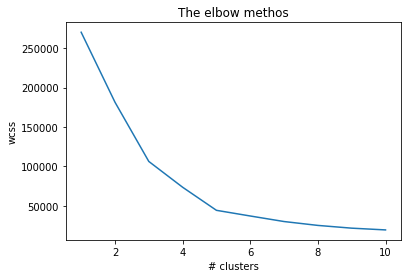

In [ ]:
# Using the elbow method to find optimal number of clusters
from sklearn.cluster import KMeans
wcss = []  # within cluster sum of square
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The elbow methos')
plt.xlabel('# clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
# Training kmeans 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


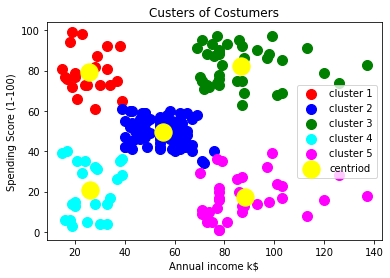

In [ ]:
# Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c='red', label='cluster 1' )
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c='blue', label='cluster 2' )
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c='green', label='cluster 3' )
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c='cyan', label='cluster 4' )
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c='magenta', label='cluster 5' )
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c ='yellow', label='centriod')
plt.title('Custers of Costumers')
plt.xlabel('Annual income k$')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
print(kmeans.cluster_centers_)

[[25.72727273 79.36363636]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]
 [88.2        17.11428571]]


# Hierarchical Clustering

In [ ]:
# Types of Hierarchical clustering
# Agglomerative and Divisive
# Agglomerative
#  Step 1  - make each data point a single cluster (N clusters)
#  Step 2  - take two closest point and make them one cluster (N-1 clusters)
#  Step 3  - take two closest clusters and make them one cluster (N-2 clusters)
#  Step 4  - repeat Step 3 until there is only one cluster left

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

dataset = pd.read_csv("/content/drive/MyDrive/Machine Learning Udemy/Mall_Customers.csv")

x = dataset.iloc[:,3:].values

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


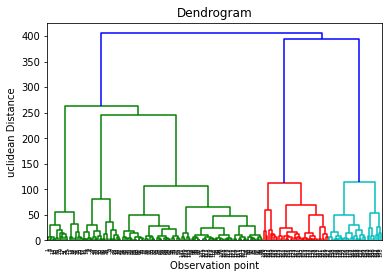

In [ ]:
# Using Dendrogram to find the optimal number of clusters

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Observation point')
plt.ylabel('uclidean Distance')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage='ward')
y_hc = hc.fit_predict(x)
print(y_hc)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


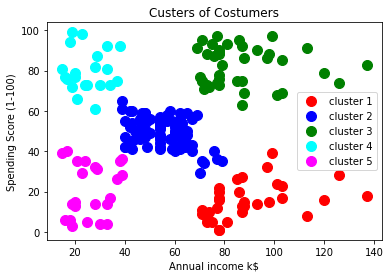

In [ ]:
# Visualising the clusters
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c='red', label='cluster 1' )
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c='blue', label='cluster 2' )
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c='green', label='cluster 3' )
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c='cyan', label='cluster 4' )
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c='magenta', label='cluster 5' )
plt.title('Custers of Costumers')
plt.xlabel('Annual income k$')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()